# Exploring Statistical Methods: Permutations, Distributions, and Hypothesis Testing

In this assignment, we will explore several fundamental statistical techniques using Python and the numpy library. The four tasks cover a range of methods useful for analyzing data and performing hypothesis tests:

**Task 1: Permutations and Combinations** — We will calculate and understand the concepts of permutations and combinations, essential for combinatorial probability.
**Task 2: numpy's Normal Distribution** — This task will demonstrate how to use numpy to generate and visualize data following a normal distribution.
**Task 3: t-Test Calculation** — We will perform a t-test to compare the means of two datasets and understand its significance.
**Task 4: ANOVA** — This task will cover the Analysis of Variance (ANOVA) to assess the statistical differences between multiple groups.
These tasks will provide a hands-on approach to understanding and applying statistical methods in Python.

The first step will then be importing the necessary libraries that will allow all the above studies:

### Justification for the Libraries Imported:

1. **math**:
   - The `math` library provides a set of mathematical functions such as logarithms, square roots, trigonometric functions, and constants (e.g., π). It's essential for carrying out basic mathematical operations that are required for statistical calculations, including those used in permutations and combinations, as well as other numerical analyses.

2. **itertools**:
   - The `itertools` library is used for creating iterators for efficient looping, such as calculating permutations and combinations. It provides functions like `permutations()` and `combinations()`, which are directly applicable in combinatorial analysis. This library helps in generating sequences without the need to manually implement the logic.

3. **random**:
   - The `random` library allows for random selections, which is necessary when dealing with sampling methods, such as simulating datasets, shuffling data, or generating random variables. It will be helpful for tasks like creating random samples from distributions or testing hypothesis.

4. **numpy**:
   - `numpy` is a core library for numerical computing in Python. It provides support for arrays and matrices, along with a vast range of mathematical functions for numerical operations. `numpy` is crucial for generating random data, performing array manipulations, and applying advanced mathematical functions—particularly when working with large datasets and statistical distributions, such as the normal distribution.

5. **matplotlib.pyplot**:
   - `matplotlib.pyplot` is a plotting library used to create static, animated, and interactive visualizations in Python. It is essential for graphing data distributions, such as visualizing the normal distribution or plotting results from hypothesis tests like the t-test or ANOVA. Visualizations are key to interpreting and presenting data clearly.

6. **scipy.stats**:
   - `scipy.stats` is a submodule of the `scipy` library that provides a comprehensive range of statistical functions. It includes tools for hypothesis testing, probability distributions, and statistical tests, such as the t-test and ANOVA. This library is vital for performing rigorous statistical analysis and hypothesis testing in the assignment.

7. **statsmodels**:
   - `statsmodels` is a library for statistical modeling, which includes tools for performing regression analysis, hypothesis testing, and statistical inference. It's useful for more advanced statistical models and tests that go beyond basic functions. This library will be beneficial when applying more complex statistical methods, like ANOVA or regression models.

These libraries were chosen for their efficiency, broad usage in the data science community, and their ability to work seamlessly together to carry out the required tasks in the assignment.

In [1]:
# Mathematical functions from the standard library.
# https://docs.python.org/3/library/math.html#module-math
import math

# Permutations and combinations
# https://docs.python.org/3/library/itertools.html#module-itertools
import itertools

# Random selections.
# https://docs.python.org/3/library/random.html#module-random
import random

# Numerical structures and operations.
# https://numpy.org/devdocs/reference/index.html#numpy-reference
import numpy as np

# Plotting.
# https://matplotlib.org/stable/contents.html
import matplotlib.pyplot as plt

# Statistics.
import scipy.stats as stats

# Statistical models.
import statsmodels as sm

# Mathematical functions.
import math

# Task 1: Permutations and Combinations


Suppose we alter the Lady Tasting Tea experiment to involve twelve cups of tea. Six have the milk in first and the other six having tea in first. A person claims they have the special power of being able to tell whether the tea or the milk went into a cup first upon tasting it. You agree to accept their claim if they can tell which of the six cups in your experiment had the milk in first.

Calculate, using Python, the probability that they select the correct six cups. Here you should assume that they have no special powers in figuring it out, that they are just guessing. Remember to show and justify your workings in code and MarkDown cells.

Suppose, now, you are willing to accept one error. Once they select the six cups they think had the milk in first, you will give them the benefit of the doubt should they have selected at least five of the correct cups. Calculate the probability, assuming they have no special powers, that the person makes at most one error.

Would you accept two errors? Explain.

By conducting this experiment, we intend to prove whether the person’s ability to identify the preparation method of the tea cups is beyond random chance. If the person can consistently and accurately identify all six milk-first cups, the evidence would support the claim that they possess a special sensory ability. Conversely, if their success rate aligns with what would be expected by random guessing, the claim would lack statistical support.

In summary, this experiment serves as a practical application of hypothesis testing, allowing us to objectively evaluate extraordinary claims using statistical evidence.

*By setting up this experiment, we can:*

- **Quantify Confidence**: Determine the likelihood that the person’s success is due to random chance versus a genuine ability.
+ **Statistical Significance**: Establish whether the results are statistically significant, meaning the observed outcome is unlikely to have occurred under the null hypothesis.
* **Objective Evaluation**: Provide an objective framework to evaluate claims of special abilities, ensuring decisions are based on evidence and probability rather than subjective judgment.

![image](images/lady_tasting_tea.png)

### Permutations
    
A permutation is an ordering of its elements.

The set `{a, b, c}` has the permutations `abc`, `acb`, `bac`, `bca`, `cab`, and `cba`.

### Combinations

A combination is a selection of `k` elements from a set of size `n`.

In combinations, order does not matter and the same element cannot be selected twice.

The combinations of size 2 from the set `{a, b, c}` are `{a, b}`, `{a, c}`, and `{b, c}`.

## Lady Tasting Tea

1 2 3 4 5 6 7 8

Calculate the number of ways to choose **k** elements from a set of **n** elements where the order of the chosen elements does not matter and no element is selected more than once.

In [2]:
# Number of cups of tea in total.
no_cups = 8

# Number of cups of tea with milk first.
no_cups_milk_first = 4

# Number of cups of tea with tea first.
no_cups_tea_first = 4

How many possible combinations are there to shuffle the 8 cups?


In [3]:
# Number of ways of selecting four cups from eight.
ways = math.comb(no_cups, no_cups_milk_first)

# Show.
ways

70

1 2 3 4 5 6 7 8

: _ _ _ _

==> COMBINATION

In [4]:
# Total number of ways of selecting four cups from eight, keeping them in order.
ways_ordered = 8 * 7 * 6 * 5

# Show.
ways_ordered

1680

1680 possible selections

Do you think order is important?

4 8 6 5

8 6 4 5

: _ _ _ _

==> PERMUTATION

In [5]:
# No of ways of shuffling four cups.
no_shuffles = 4 * 3 * 2 * 1

# Show.
no_shuffles

24

24 ways of ordering 4 elements

In [6]:
# No of combinations.
no_combs = ways_ordered // no_shuffles

# Show.
no_combs

70

### Formula

In mathematics, the [`math.comb()`](https://docs.python.org/3/library/math.html#math.comb') function is called the *choose* function.

It is written and calculated as

$\binom{n}{k} = \frac{n!}{k!(n-k)!}$

**Factorial**  

**n!** = the multiplication of all positive integers, say "n", that will be smaller than or equivalent to n is known as the factorial.

**Number of cups of tea in total.**  

**n** = 8

**Number of cups of tea with milk/tea in first.**  

**k** = 4

### [math.factorial](https://docs.python.org/3/library/math.html#math.factorial)

In [7]:
# Number of cups
n = 8

# Number of cups of tea with milk/tea first.
k = 4

# Factorial on number of cups.
fact_n = math.factorial(n)

# Factorial of number of cups of tea with milk/tea first.
fact_k = math.factorial(k)

# Factorial of  number of cups - number of cups of tea with milk/tea first.
diff_n_k =  n-k
fact_diff_n_k = math.factorial(diff_n_k)

# Applying formula: COMBINATION
# No of ways of selecting k objects from n without replacement and without order.
comb = fact_n // (fact_k * fact_diff_n_k)

# Show result.
comb

70

```  
n! = 8 x 7 x 6 x 5 x 4 x 3 x 2 x 1  
k! = 4 x 3 x 2 x 1  
(n - k)! = 4 x 3 x 2 x 1  
n!/(n-k) = (8 x 7 x 6 x 5 x 4 x 3 x 2 x 1) / (4 x 3 x 2 x 1) = 8 x 7 x 6 x 5  
```  

### Ordering of Results

https://docs.python.org/3/library/itertools.html#itertools.combinations

In [8]:
# The cups labels.
labels = list(range(no_cups))

# Show.
labels

[0, 1, 2, 3, 4, 5, 6, 7]

In [9]:
# Shiw the different ways of selecting no_cups+milk_first out of no_cuos cups of tea.
combs = list(itertools.combinations(labels,no_cups_milk_first))

# Show,
combs

[(0, 1, 2, 3),
 (0, 1, 2, 4),
 (0, 1, 2, 5),
 (0, 1, 2, 6),
 (0, 1, 2, 7),
 (0, 1, 3, 4),
 (0, 1, 3, 5),
 (0, 1, 3, 6),
 (0, 1, 3, 7),
 (0, 1, 4, 5),
 (0, 1, 4, 6),
 (0, 1, 4, 7),
 (0, 1, 5, 6),
 (0, 1, 5, 7),
 (0, 1, 6, 7),
 (0, 2, 3, 4),
 (0, 2, 3, 5),
 (0, 2, 3, 6),
 (0, 2, 3, 7),
 (0, 2, 4, 5),
 (0, 2, 4, 6),
 (0, 2, 4, 7),
 (0, 2, 5, 6),
 (0, 2, 5, 7),
 (0, 2, 6, 7),
 (0, 3, 4, 5),
 (0, 3, 4, 6),
 (0, 3, 4, 7),
 (0, 3, 5, 6),
 (0, 3, 5, 7),
 (0, 3, 6, 7),
 (0, 4, 5, 6),
 (0, 4, 5, 7),
 (0, 4, 6, 7),
 (0, 5, 6, 7),
 (1, 2, 3, 4),
 (1, 2, 3, 5),
 (1, 2, 3, 6),
 (1, 2, 3, 7),
 (1, 2, 4, 5),
 (1, 2, 4, 6),
 (1, 2, 4, 7),
 (1, 2, 5, 6),
 (1, 2, 5, 7),
 (1, 2, 6, 7),
 (1, 3, 4, 5),
 (1, 3, 4, 6),
 (1, 3, 4, 7),
 (1, 3, 5, 6),
 (1, 3, 5, 7),
 (1, 3, 6, 7),
 (1, 4, 5, 6),
 (1, 4, 5, 7),
 (1, 4, 6, 7),
 (1, 5, 6, 7),
 (2, 3, 4, 5),
 (2, 3, 4, 6),
 (2, 3, 4, 7),
 (2, 3, 5, 6),
 (2, 3, 5, 7),
 (2, 3, 6, 7),
 (2, 4, 5, 6),
 (2, 4, 5, 7),
 (2, 4, 6, 7),
 (2, 5, 6, 7),
 (3, 4, 5, 6),
 (3, 4, 5,

In [10]:
# Number of combinations.
len(combs)

70

In [11]:
# Select four cups at random to put milk in first.
# https://docs.python.org/3/library/random.html#random.sample
labels_milk = random.sample(labels, 4)

# Sort in place.
labels_milk.sort()

# Show
labels_milk

[0, 3, 5, 7]

In [12]:
# Turn labels_milk into a set.
# Uses: https://docs.python.org/3/tutorial/datastructures.html#sets
set(labels_milk)

{0, 3, 5, 7}

In [13]:
# Calculate the overlap between each element of combs and labels_milk.

no_overlaps = []

for comb in combs:
    # Turn comb into a set.
    s1 = set(comb)
    # Turn labels_milk into a set.
    s2 = set(labels_milk)
    # Figure out where they overlap.
    overlap = s1.intersection(s2)
    print(comb, overlap, len(overlap))
    # Append overlaps to no_overlaps.
    no_overlaps.append(len(overlap))


(0, 1, 2, 3) {0, 3} 2
(0, 1, 2, 4) {0} 1
(0, 1, 2, 5) {0, 5} 2
(0, 1, 2, 6) {0} 1
(0, 1, 2, 7) {0, 7} 2
(0, 1, 3, 4) {0, 3} 2
(0, 1, 3, 5) {0, 3, 5} 3
(0, 1, 3, 6) {0, 3} 2
(0, 1, 3, 7) {0, 3, 7} 3
(0, 1, 4, 5) {0, 5} 2
(0, 1, 4, 6) {0} 1
(0, 1, 4, 7) {0, 7} 2
(0, 1, 5, 6) {0, 5} 2
(0, 1, 5, 7) {0, 5, 7} 3
(0, 1, 6, 7) {0, 7} 2
(0, 2, 3, 4) {0, 3} 2
(0, 2, 3, 5) {0, 3, 5} 3
(0, 2, 3, 6) {0, 3} 2
(0, 2, 3, 7) {0, 3, 7} 3
(0, 2, 4, 5) {0, 5} 2
(0, 2, 4, 6) {0} 1
(0, 2, 4, 7) {0, 7} 2
(0, 2, 5, 6) {0, 5} 2
(0, 2, 5, 7) {0, 5, 7} 3
(0, 2, 6, 7) {0, 7} 2
(0, 3, 4, 5) {0, 3, 5} 3
(0, 3, 4, 6) {0, 3} 2
(0, 3, 4, 7) {0, 3, 7} 3
(0, 3, 5, 6) {0, 3, 5} 3
(0, 3, 5, 7) {0, 3, 5, 7} 4
(0, 3, 6, 7) {0, 3, 7} 3
(0, 4, 5, 6) {0, 5} 2
(0, 4, 5, 7) {0, 5, 7} 3
(0, 4, 6, 7) {0, 7} 2
(0, 5, 6, 7) {0, 5, 7} 3
(1, 2, 3, 4) {3} 1
(1, 2, 3, 5) {3, 5} 2
(1, 2, 3, 6) {3} 1
(1, 2, 3, 7) {3, 7} 2
(1, 2, 4, 5) {5} 1
(1, 2, 4, 6) set() 0
(1, 2, 4, 7) {7} 1
(1, 2, 5, 6) {5} 1
(1, 2, 5, 7) {5, 7} 2
(1, 2, 6, 7) {7} 1

In [14]:
# Show the overlaps.
print(no_overlaps)

[2, 1, 2, 1, 2, 2, 3, 2, 3, 2, 1, 2, 2, 3, 2, 2, 3, 2, 3, 2, 1, 2, 2, 3, 2, 3, 2, 3, 3, 4, 3, 2, 3, 2, 3, 1, 2, 1, 2, 1, 0, 1, 1, 2, 1, 2, 1, 2, 2, 3, 2, 1, 2, 1, 2, 2, 1, 2, 2, 3, 2, 1, 2, 1, 2, 2, 3, 2, 3, 2]


In [15]:
# Count the number of times each overlap occurs.
counts = np.unique(no_overlaps, return_counts=True)

# Show.
counts

(array([0, 1, 2, 3, 4]), array([ 1, 16, 36, 16,  1]))

<BarContainer object of 5 artists>

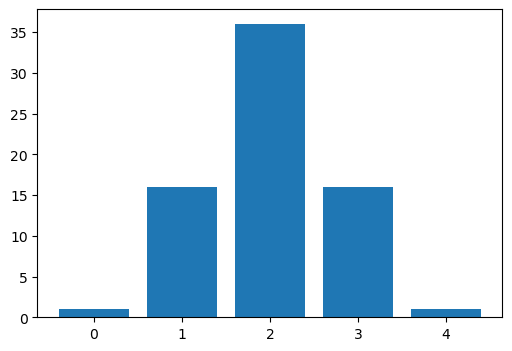

In [16]:
# Create a figure.
fig, ax = plt.subplots(figsize =(6,4))

# Bar chart.
ax.bar(counts[0], counts[1])

### The Null Hypothsis

- The lady has no special power to tell the difference between cups of tea with milk in first amd cups of tea with tea in first.  

- The lady is selecting the four cups from the eight at random.

### The Alternative Hypothesis

- The lady can tell the difference.

==> **EVIDENCE**

Fisher: if the lady is just picking four cups at random, then it is unlikely she will pick the correct four. The probability is one in seventy. It is so unlikely, that I will agree that something non-random is happening when she is selecting the cups of tea.

In [17]:
# The probability that she (randomly) selects the four correct cups.
1 / 70

0.014285714285714285

In [18]:
# The probability that she (randomly) selects at least thee correct cups.
(16 + 1) / 70

0.24285714285714285

### Type I Errors, Type II Errors, and Power

 - Type I and Type II errors: https://en.wikipedia.org/wiki/Type_I_and_type_II_errors
 - Power: https://en.wikipedia.org/wiki/Power_(statistics)

# Task 2: numpy's Normal Distribution

![image](images/normal_distribution.png)

In this task you will assess whether numpy.random.normal() properly generates normal values. To begin, generate a sample of one hundred thousand values using the function with mean 10.0 and standard deviation 3.0.

Use the scipy.stats.shapiro() function to test whether your sample came from a normal distribution. Explain the results and output.

Plot a histogram of your values and plot the corresponding normal distribution probability density function on top of it.

In [19]:
# Binomial distribution.
import numpy as np

# Plotting.
import matplotlib.pyplot as plt

### Flipping Several Coins

In [20]:
# Flip a single coin.
coin = ["Tail", "Head"]
flip = np.random.binomial(1, 0.5)  # 0 for Tail, 1 for Head
print(coin[flip])

Head


In [21]:
# Flip a single coin several times.
flips = np.random.binomial(1,0.5,1000)# 1000 flips

# Show.
for flip in flips:
    print(coin[flip])

Head
Tail
Head
Head
Tail
Head
Head
Head
Tail
Head
Tail
Tail
Head
Tail
Head
Tail
Head
Tail
Tail
Head
Tail
Tail
Tail
Head
Head
Head
Tail
Head
Head
Head
Head
Head
Tail
Head
Head
Tail
Head
Tail
Tail
Head
Tail
Head
Tail
Head
Head
Tail
Tail
Tail
Tail
Head
Tail
Tail
Head
Head
Tail
Head
Head
Tail
Head
Tail
Head
Tail
Tail
Head
Head
Tail
Head
Tail
Tail
Head
Head
Tail
Tail
Tail
Head
Head
Tail
Head
Tail
Head
Tail
Head
Head
Tail
Tail
Tail
Head
Tail
Head
Tail
Tail
Head
Head
Head
Tail
Tail
Head
Head
Head
Head
Tail
Tail
Tail
Head
Head
Tail
Head
Tail
Head
Head
Head
Head
Tail
Tail
Tail
Head
Head
Tail
Head
Head
Head
Head
Head
Head
Tail
Head
Tail
Head
Head
Tail
Tail
Tail
Tail
Head
Head
Head
Head
Head
Tail
Tail
Tail
Head
Tail
Head
Tail
Tail
Tail
Tail
Head
Head
Tail
Tail
Tail
Head
Head
Tail
Tail
Head
Tail
Head
Head
Tail
Head
Head
Tail
Tail
Tail
Head
Head
Head
Head
Head
Tail
Tail
Head
Tail
Tail
Head
Tail
Head
Head
Head
Head
Tail
Tail
Tail
Head
Tail
Tail
Tail
Tail
Tail
Head
Head
Tail
Head
Tail
Tail
Head
Head


In [22]:
# Count heads.
heads = flips.sum()

# Count tails (total flips - heads)
tails = len(flips) - heads

# Show results
print(f"Heads: {heads}")
print(f"Tails: {tails}")

Heads: 538
Tails: 462


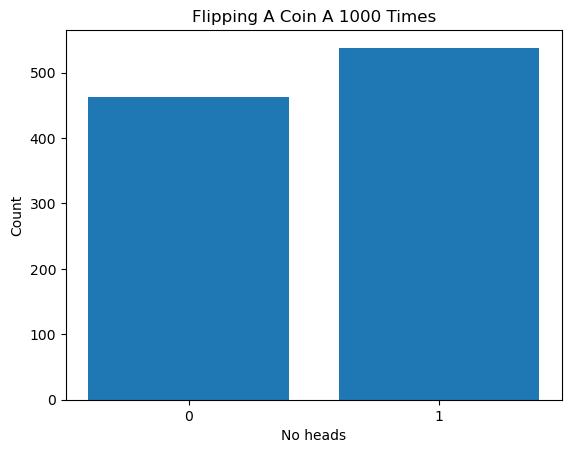

In [23]:
# Create a blank plot.
fig, ax = plt.subplots()

# Create a bar chart.
ax.bar([0, 1], [1000 - heads, heads])

# Add x labels.
ax.set_xticks([0, 1])

# Add title.
ax.set_title('Flipping A Coin A 1000 Times')

# Add y label.
ax.set_xlabel('No heads')
ax.set_ylabel('Count')

# Show.
plt.show();

In [24]:
# Flip two coins several times.
twoflips = np.random.binomial(2,0.5,1000)# 1000 flips

# Show.
twoflips

array([1, 2, 0, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 0, 0, 0, 0, 1, 2, 2, 1,
       0, 1, 2, 1, 0, 0, 1, 1, 2, 1, 0, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1,
       0, 2, 2, 0, 0, 1, 1, 1, 1, 2, 1, 0, 1, 0, 1, 2, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 2, 2, 1, 2, 1, 0, 0, 1, 2, 1, 2, 1, 1, 2, 2,
       1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 0, 2, 1, 1, 1, 0,
       2, 2, 2, 1, 0, 2, 1, 2, 0, 2, 1, 0, 2, 2, 0, 1, 2, 2, 1, 1, 2, 0,
       2, 2, 1, 0, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 0, 1, 1,
       2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0, 2,
       2, 1, 0, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 2, 2,
       2, 1, 0, 1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 2, 0, 2, 1, 1, 1, 1, 2,
       1, 0, 2, 1, 0, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 0, 2, 2, 1, 1, 0, 1,
       0, 0, 1, 2, 2, 1, 1, 1, 2, 2, 1, 0, 1, 1, 1, 2, 1, 2, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 2, 0, 1,

In [25]:
# Count the number of times each value occurs.
uniques, counts = np.unique(twoflips, return_counts=True)

# Show.
uniques, counts

(array([0, 1, 2]), array([230, 515, 255]))

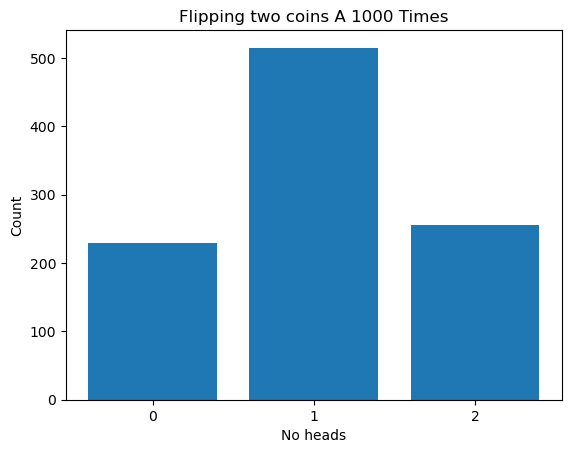

In [26]:
# Create a blank plot.
fig, ax = plt.subplots()

# Create a bar chart.
ax.bar(uniques, counts)

# Add x labels.
ax.set_xticks([0, 1, 2])

# Add title.
ax.set_title('Flipping two coins A 1000 Times')

# Add y label.
ax.set_xlabel('No heads')
ax.set_ylabel('Count')

# Show.
plt.show();

In [27]:
# Flip two coins several times keeping the individual results.
twoflipsind = np.random.binomial(1,0.5, (1000, 2))

# Show.
twoflipsind

array([[0, 0],
       [0, 0],
       [0, 1],
       ...,
       [1, 0],
       [1, 0],
       [1, 1]])

In [28]:
# Count the number of times each value occurs.
np.unique(twoflipsind, return_counts=True, axis =0)

(array([[0, 0],
        [0, 1],
        [1, 0],
        [1, 1]]),
 array([243, 256, 230, 271]))

In [29]:
# Number of coins to flip.
n = 100

# Number of times to do it.
k = 100 * n

# Flip two coins several times.
nflips = np.random.binomial(n, 0.5, k)

# Count the number of times each value occurs.
uniques, counts = np.unique(nflips, return_counts=True)

# Show.
uniques, counts

(array([32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
        50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66,
        67, 68, 70]),
 array([  2,   5,  11,  20,  17,  39,  73, 123, 157, 216, 283, 373, 525,
        542, 679, 749, 759, 841, 742, 710, 676, 615, 449, 402, 319, 234,
        186, 107,  65,  38,  24,   7,   5,   4,   1,   1,   1]))

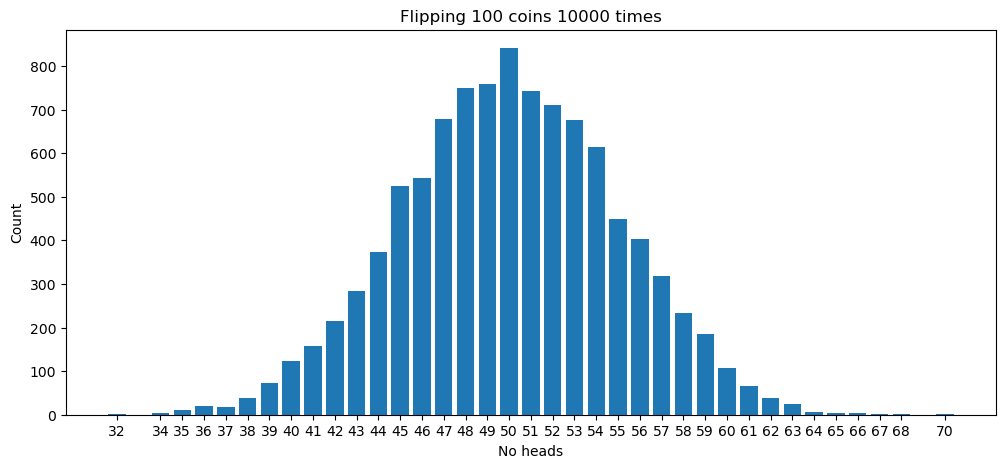

In [30]:
# Create a blank plot.
fig, ax = plt.subplots(figsize = (12, 5))

# Create a bar chart.
ax.bar(uniques, counts)

# Add x labels.
ax.set_xticks(uniques)

# Add title.
ax.set_title(f'Flipping {n} coins {k} times')

# Add y label.
ax.set_xlabel('No heads')
ax.set_ylabel('Count')

# Show.
plt.show();

### Probability Density Function

$ f(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{(x - \mu)^2}{2 \sigma^2}}$

https://en.wikipedia.org/wiki/Normal_distribution

In [31]:
def f(x, mu=0.0, sigma=1.0):
  # The normalisation constant.
  norm = 1.0 / np.sqrt(2.0 * np.pi * sigma**2)
  
  # f(x)
  return norm * np.exp(-(x - mu)**2 / (2.0 * sigma**2))

In [32]:
# Test the function.
f(0.0) 

0.3989422804014327

In [33]:
# Create an x range.
x = np.linspace(-5, 5, 1001)

# Get an y values.
y = f(x)

# Show.
x, y

(array([-5.  , -4.99, -4.98, ...,  4.98,  4.99,  5.  ]),
 array([1.48671951e-06, 1.56286711e-06, 1.64275059e-06, ...,
        1.64275059e-06, 1.56286711e-06, 1.48671951e-06]))

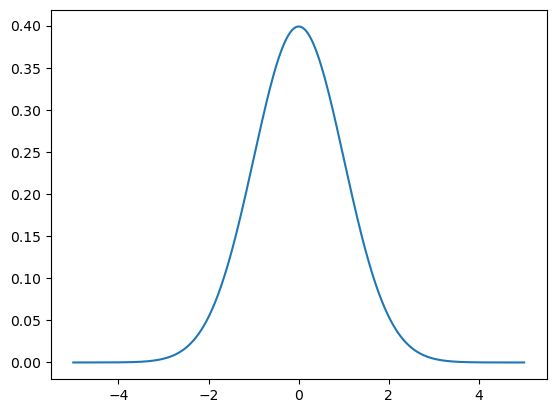

In [34]:
# Create an empty plot.
fig, ax = plt.subplots()

# Plot the function.
ax.plot(x, y);

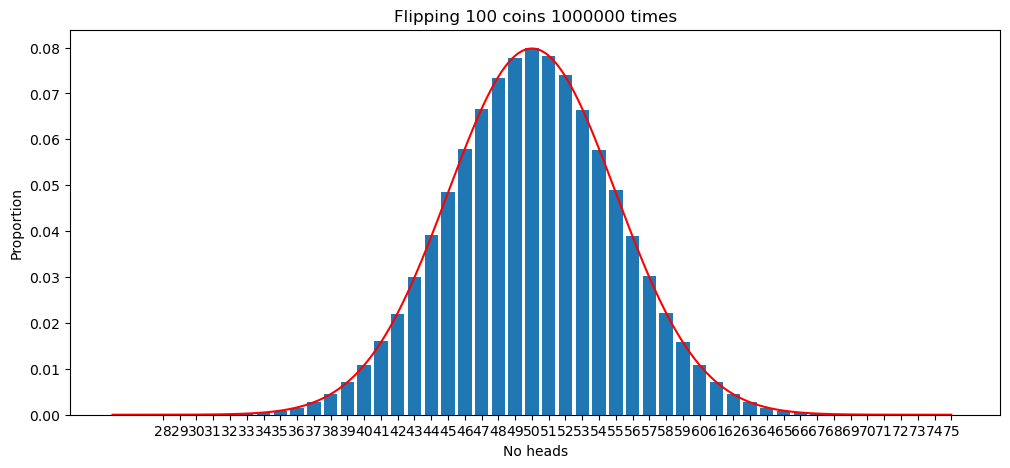

In [35]:
# Number of coins to flip.
n = 100

# Number of times to do it.
k = 10000 * n

# Probability of heads.
p = 0.5

# Flip two coins several times.
nflips = np.random.binomial(n, p, k)

# Count the number of times each value occurs.
uniques, counts = np.unique(nflips, return_counts=True)

# Create a blank plot.
fig, ax = plt.subplots(figsize=(12, 5))

# Create a bar chart.
ax.bar(uniques, counts / k)

# Create an x range.
x = np.linspace(25, 75, 1001)

# Get y values.
y = f(x, mu=n*p, sigma=np.sqrt(n * p * (1 - p)))

# Plot the function.
ax.plot(x, y, 'r-')

# Set x ticks.
ax.set_xticks(uniques)

# Add title.
ax.set_title(f'Flipping {n} coins {k} times')

# Add axis label.
ax.set_xlabel('No heads')
ax.set_ylabel('Proportion');

### Plots

https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html#numpy-random-normal

In [36]:
# Generate normal random sample.
data = np.random.normal(size=6)

# Show.
data

array([-0.16184984,  0.36344451,  0.54002186, -0.87381183, -0.67274633,
        0.07685333])

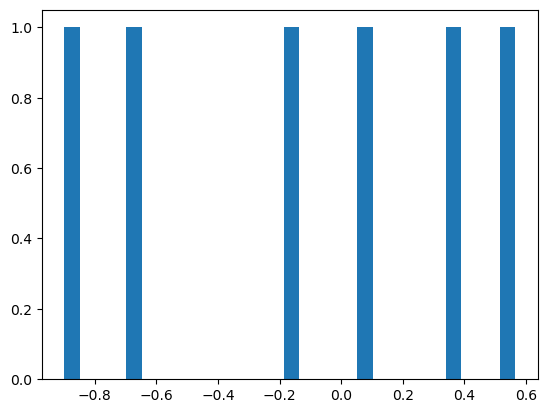

In [37]:
# Create a blank plot.
fig, ax = plt.subplots()

# Count unique values.
counts, uniques = np.unique(data, return_counts=True)

# Create a bar chart.
ax.bar(counts,uniques, width=0.05);

In [38]:
# Generate normal random sample.
data = np.random.normal(size=100)

# Show.
data

array([ 0.0828599 , -0.84091553, -0.17179227,  0.23149444, -0.06330704,
       -0.16702182, -1.11398677,  0.9240993 , -1.67604462,  0.50619063,
        0.93438479, -1.36032159, -1.15690781, -0.63545664,  1.23109506,
        1.39098717, -0.82922617,  0.18737322, -1.3165184 ,  1.19090984,
       -0.99761452, -0.06080299,  0.17484537,  0.38898012,  0.66215573,
       -1.43060305,  1.21682967,  1.15009497, -0.60755172, -0.15234188,
       -0.15298194,  1.46347217, -1.19168997, -0.83969565,  1.40971436,
       -0.19486798, -1.33095375, -0.22648078,  0.02749777,  1.11728185,
        0.75177848,  0.62812752, -1.22295395, -1.20368126, -1.08467558,
        0.07970164,  1.03540782, -0.31756579, -0.23932261,  0.34638594,
       -0.80435805, -0.26316563,  0.67558908, -1.37626183,  1.26069688,
        0.3290671 ,  0.28144817, -0.13938867, -0.62004815, -1.34175919,
        0.75574208,  1.29423708, -1.01575675, -1.81815024,  0.64958005,
       -0.78860693,  1.24341936, -0.85827222,  1.28318466,  1.29

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib-pyplot-hist

https://numpy.org/doc/stable/reference/generated/numpy.histogram.html#numpy-histogram

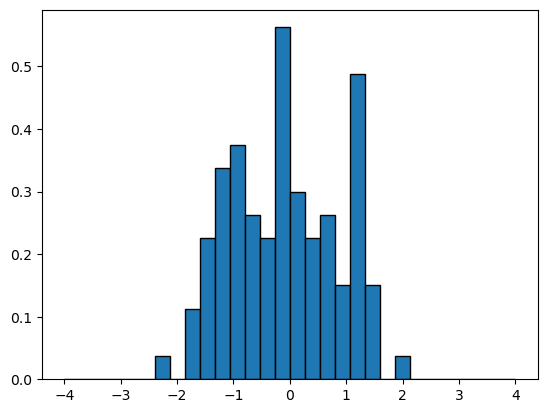

In [39]:
# Create a blank plot.
fig, ax = plt.subplots()

# Create a bar chart.
ax.hist(data, edgecolor='black', density=True, bins=np.linspace(-4,4,31));

https://www.statsmodels.org/dev/generated/statsmodels.graphics.gofplots.qqplot.html#statsmodels-graphics-gofplots-qqplot

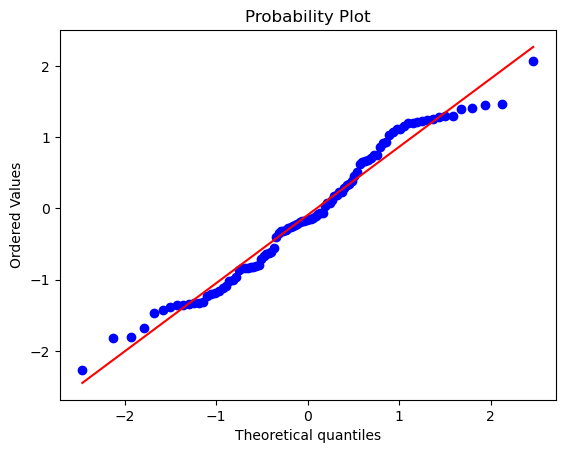

In [40]:
# Create an emptyplot.
fig, ax = plt.subplots()

# Create a qq plot.
stats.probplot(data, dist='norm', plot=ax);

### Shapiro-Wilk Test

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html#shapiro

In [41]:
# Perform the Shapiro Wilk test.
stats.shapiro(data)

ShapiroResult(statistic=0.9738600625699849, pvalue=0.04395219620274768)

### Integration

https://en.wikipedia.org/wiki/97.5th_percentile_point

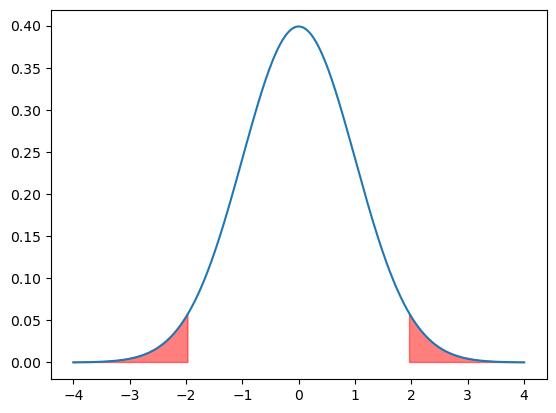

In [42]:
# Adapted from https://stackoverflow.com/questions/10138085/how-to-plot-normal-distribution

# Create a blank plot.
fig, ax = plt.subplots()

# X values.
x = np.linspace(-4.0,4.0, 1000)

# Plot the normal distribution.
plt.plot(x, stats.norm.pdf(x))

plt.fill_between(x, stats.norm.pdf(x), where=(x< -1.96) | (x>1.96), color='red', alpha=0.5);

### Central Limit Theorem

# Task 3: t-Test Calculation

![image](images/t_Test.png)

## $t$-Tests

Consider the following dataset containing resting heart rates for patients before and after embarking on a two-week exercise program.

| Patient ID | 0  | 1  | 2  | 3  | 4  | 5  | 6  | 7  | 8  | 9  |
|------------|----|----|----|----|----|----|----|----|----|----|
| Before     | 63 | 68 | 70 | 64 | 74 | 67 | 70 | 57 | 66 | 65 |
| After      | 64 | 64 | 68 | 64 | 73 | 70 | 72 | 54 | 61 | 63 |





Calculate the t-statistic based on this data set, using Python. Compare it to the value given by scipy.stats. Explain your work and list any sources used.

In [43]:
# numerical arrays.
import numpy as np

# Statistical functions.
import scipy.stats as stats

# Data frames.
import pandas as pd

# Plotting.
import matplotlib.pyplot as plt

# Statistical plots.
import seaborn as sns

### Normal Data

[numpy.random.normal](https://numpy.org/doc/2.0/reference/random/generated/numpy.random.normal.html#numpy-random-normal)

In [44]:
# Group A.
group_a = np.random.normal(0.07, 0.02, 30)

# Group B.
group_b = np.random.normal(0.03, 0.02, 30)

group_a, group_b

(array([0.09131508, 0.07837404, 0.07691883, 0.07992335, 0.07697559,
        0.07681404, 0.04296032, 0.05073568, 0.06372271, 0.10897103,
        0.08644007, 0.04107018, 0.02441757, 0.04963709, 0.04575012,
        0.06821562, 0.04100843, 0.06575617, 0.06585139, 0.10932943,
        0.06865208, 0.05968966, 0.1112326 , 0.07391009, 0.06243696,
        0.04455824, 0.07813481, 0.01609133, 0.08872823, 0.04649125]),
 array([ 3.96819716e-02,  5.20887152e-02,  3.75662370e-03,  5.95038933e-02,
         4.22329672e-02,  2.09915880e-02,  4.65197250e-02,  3.84707645e-02,
         8.68857808e-03,  4.91169134e-02,  2.87419242e-02,  1.35833519e-02,
         4.84739016e-02,  4.74159652e-02,  6.40474900e-02,  1.60865955e-02,
         3.58645911e-02,  3.77268537e-02,  2.34138349e-02,  4.22177136e-02,
         1.59264041e-02,  2.94454153e-02,  3.06745505e-02,  1.88690693e-02,
         1.48316556e-03,  3.07388724e-02, -2.80771143e-03,  2.64429000e-02,
         4.41651241e-02,  3.89175587e-06]))

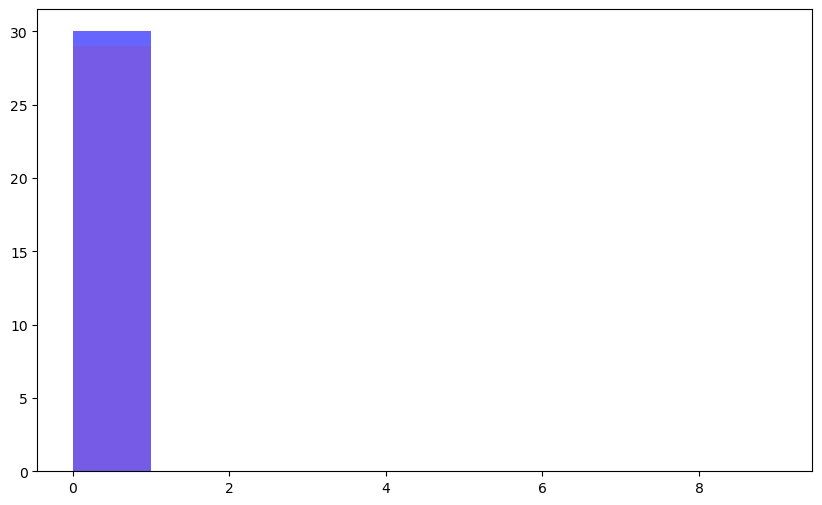

In [45]:
# Create an empty dataframe.
fig, ax = plt.subplots(figsize= (10, 6))

# Plot the histogram for Group A.
ax.hist(group_a, bins=range(10), alpha=0.6, color='b', label="Group A")


# Plot the histogram for Group B with a different color.
ax.hist(group_b, bins=range(10), alpha=0.1, color='r', label="Group B")

# Show the plot.
plt.show()

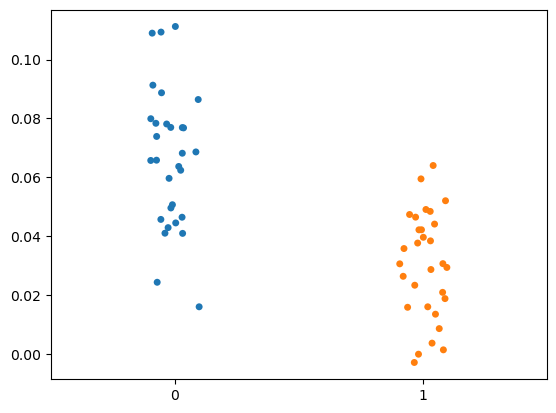

In [46]:
# Create a stripplot.
sns.stripplot(data=[group_a, group_b]);

<Axes: >

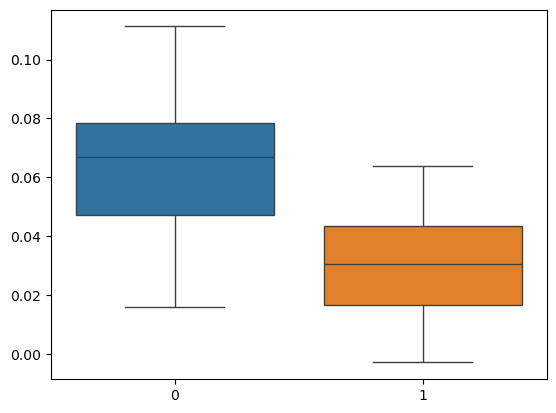

In [47]:
# Blox plot.
sns.boxplot(data=[group_a, group_b])

### Independent Samples $t$-Test

[scipy.stats.ttest_ind](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html#ttest-ind)

**Null Hypothesis**: the population means are equal 

In [48]:
# Perform a t-test.
stats.ttest_ind(group_a, group_b)

TtestResult(statistic=6.65543741096032, pvalue=1.1084924992920484e-08, df=58.0)

### Paired Samples $t$-Test

In [49]:
# A group of normally distributed values.
group_a = np.random.normal(5, 0.2, 30)

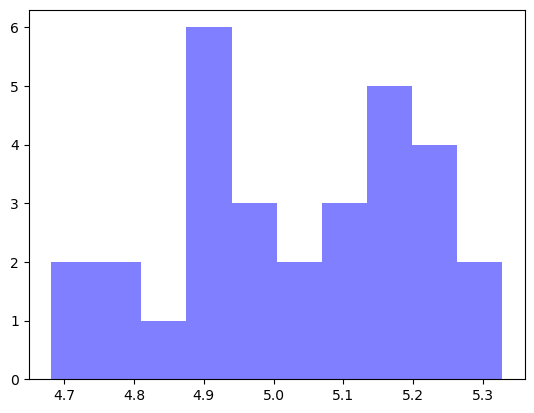

In [50]:
# Plotting normally distributed values with histogram.
plt.hist(group_a, color='blue', alpha=0.5, label= 'Group A');

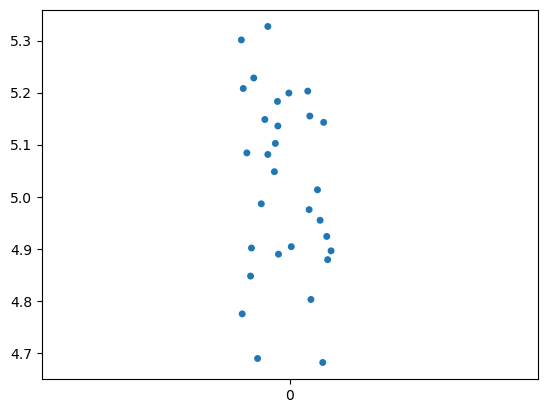

In [51]:
# Strip plot.
sns.stripplot(data=[group_a]);

In [52]:
# A group of normally distributed values.
group_a = np.random.normal(5, 0.2, 30)

# Add normally distributed values.
group_b = group_a + np.random.normal(0.0, 0.1, 30)

(<Axes: >,)

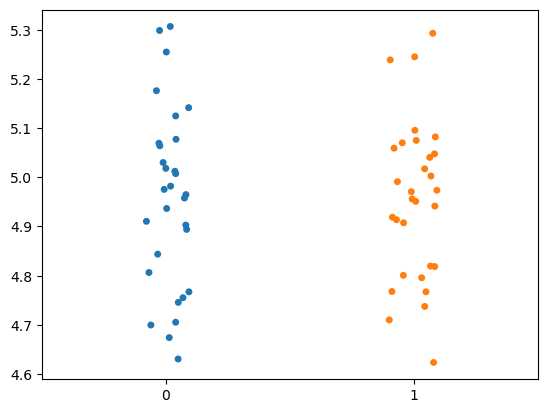

In [53]:
# Strip plot.
sns.stripplot(data=[group_a, group_b]),

### scipy.stats.ttest_rel

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html#ttest-rel

In [54]:
# Paired samples t-test.
stats.ttest_rel(group_a, group_b)

TtestResult(statistic=0.23602799238812552, pvalue=0.8150700061884342, df=29)

The *Null* hypothesis is not going to be rejected because the mean has not been changed (5 for both groups).

# Task 4: ANOVA

![image](images/anova.png)

**Analysis of Variance**

Where "variance" is the square of standard deviation (how wide the curve of the bell tends to be).  

### More Samples

In [55]:
# First sample.
sample_a = np.random.normal(loc=10.0, scale=1.0, size=50)

# Second sample.
sample_b = np.random.normal(loc=10.0, scale=1.0, size=50)

# Third sample.
sample_c = np.random.normal(loc=10.0, scale=1.0, size=50)

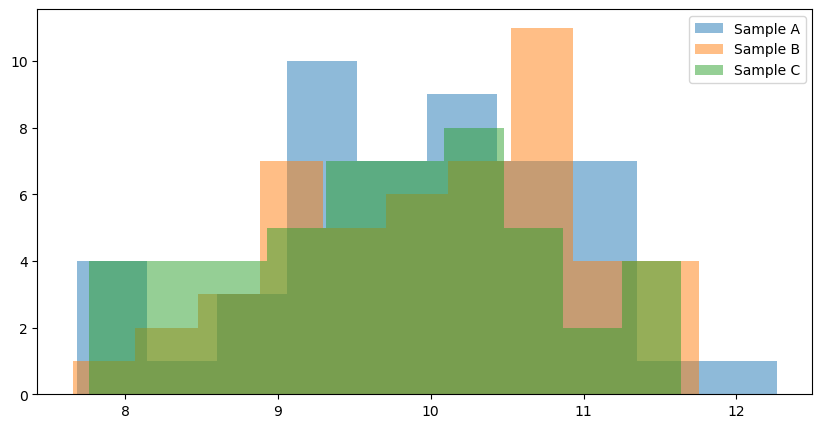

In [56]:
# Create histograms.
fig, ax = plt.subplots(figsize=(10, 5))

# Histogram of the first sample.
ax.hist(sample_a, bins=10, alpha=0.5, label='Sample A')

# Histogram of the second sample.
ax.hist(sample_b, bins=10, alpha=0.5, label='Sample B')

# Histogram of the third sample.
ax.hist(sample_c, bins=10, alpha=0.5, label='Sample C')

# Add a legend
ax.legend();

The *Null* hypothesis of a $t$-test typically states that the means of the two groups are equal.  

• If $p-value < 0.05$:  
• The difference between the two means is statistically significant.  
-> You have enough evidence to reject the null hypothesis, concluding that the two datasets likely do not have the same mean.  
• If $p-value ≥ 0.05$:  
• The difference between the means is not statistically significant.  
-> You fail to reject the null hypothesis, meaning there’s insufficient evidence to claim the means are different.  

In [57]:
# Independent samples t-test on sample_a and sample_b.
t_statistic, p_value = stats.ttest_ind(sample_a, sample_b)

# Show.
t_statistic, p_value

(-0.6688397952002839, 0.5051701781479221)

Swapping the two samples, the sign of the t-statistic changes, but its magnitude and the p-value stay the same because the p-value is based on the absolute value of the t-statistic (it tests the null hypothesis that the means are equal): the sign change reflects the change in direction of the difference between the sample means.

In [58]:
# Independent samples t-test on sample_a and sample_b swapped.
t_statistic, p_value = stats.ttest_ind(sample_b, sample_a)

# Show.
t_statistic, p_value

(0.6688397952002839, 0.5051701781479221)

In [59]:
# Independent samples t-test on sample_a and sample_c.
t_statistic, p_value = stats.ttest_ind(sample_a, sample_c)

# Show.
t_statistic, p_value

(1.0589679320038698, 0.29221754016146395)

In [60]:
# Independent samples t-test on sample_b and sample_c.
t_statistic, p_value = stats.ttest_ind(sample_b, sample_c)

# Show.
t_statistic, p_value

(1.7893238195418546, 0.07665178379330748)

### $n$ Samples

If you have *N* samples, for example 4, how many different $t-tests$ could you perform?  

For 4 samples, you could perform 6 pairwise t-tests.

Supposing your samples are labeled as A,B,C,D, the possible t-tests are:

1. A vs. B
2. A vs. C
3. A vs. D
4. B vs. C
5. B vs. D
6. C vs. D

To obtain the number of combinations the following formula called the *combination formula* is applied:
 
$\binom nk=^nC_k=\frac{n!}{k!(n-k)!}$  

In mathematics, a combination is a selection of items from a set that has distinct members, such that the order of selection does not matter (unlike permutations).

In [61]:
# Number of samples.
n = 4

In [62]:
# Show the sample labels.
print(list((range(4))))

[0, 1, 2, 3]


For 4 samples, we can perform 6 t-tests:

[0, 1]
[0, 2]
[0, 3]
[1, 2]
[1, 3]
[2, 3]  

The $n$ chooses $k$ formula also called the *binomial* coefficient:  

$$  {n \choose k} = \frac{n!}{k!(n - k)!} $$

In [63]:
# Number of ways of selecting two samples from n.
math.comb(n, 2)

6

In [64]:
# Suppose we had 6 samples.
n = 6
math.comb(n, 2)

15

In [65]:
# Suppose we had 7 samples.
n = 7
math.comb(n, 2)

21

### Type I Errors

In [72]:
def simulate_ttest(alpha=0.05):
    # Generate a random sample a.
    sample_a = np.random.normal(loc=10.0, scale=1.0, size=50)
    # Generate a random sample b.
    sample_b = np.random.normal(loc=10.0, scale=1.0, size=50)
    # Perform the t-test.
    _, p_value = stats.ttest_ind(sample_a, sample_b)
    # Decide whether to reject the null hypothesis.
    if p_value < alpha:
        return True
    else:
        return False

In [ ]:
# Number of rejections.
no_rejections = 0

# Run several simulations.
for _ in range (100000):
    # Check if the null hypothesis is rejected.
    if simulate_ttest():
        # Increment the number of rejections.
        no_rejections += 1

# Show the number of rejections.
no_rejections

5055

## End